In [77]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import math
sb.set()

In [78]:
miamiData = pd.read_csv('miami-housing.csv')
miamiData.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.222800e+11,440000,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,6.222800e+11,349000,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,6.222800e+11,800000,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,6.222800e+11,988000,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,6.222800e+11,755000,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [79]:
miamiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  float64
 3   SALE_PRC           13932 non-null  int64  
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

### For ocean distance

In [80]:
oceanData = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE', 'OCEAN_DIST']])
oceanData.head()

,LATITUDE,LONGITUDE,OCEAN_DIST
0,25.891031,-80.160561,12811.4
1,25.891324,-80.153968,10648.4
2,25.891334,-80.153740,10574.1
3,25.891765,-80.152657,10156.5
4,25.891825,-80.154639,10836.8


In [81]:
kmeans = KMeans(n_clusters=6) # not sure how many clusters we should have
oceanData['Cluster'] = kmeans.fit_predict(oceanData)
oceanData['Cluster'] = oceanData['Cluster'].astype("category")

oceanData.head()

,LATITUDE,LONGITUDE,OCEAN_DIST,Cluster
0,25.891031,-80.160561,12811.4,5
1,25.891324,-80.153968,10648.4,0
2,25.891334,-80.153740,10574.1,0
3,25.891765,-80.152657,10156.5,0
4,25.891825,-80.154639,10836.8,0


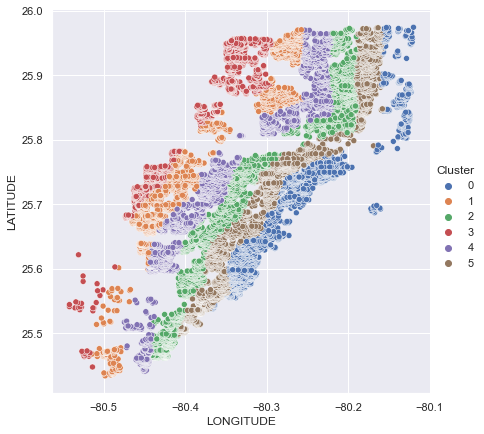

In [82]:
sb.relplot(x="LONGITUDE", y="LATITUDE", hue="Cluster", data=oceanData, height=6)

#### using sale price as target 

In [83]:
oceanData["SALE_PRC"] = miamiData["SALE_PRC"]
oceanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LATITUDE    13932 non-null  float64 
 1   LONGITUDE   13932 non-null  float64 
 2   OCEAN_DIST  13932 non-null  float64 
 3   Cluster     13932 non-null  category
 4   SALE_PRC    13932 non-null  int64   
dtypes: category(1), float64(3), int64(1)
memory usage: 449.3 KB


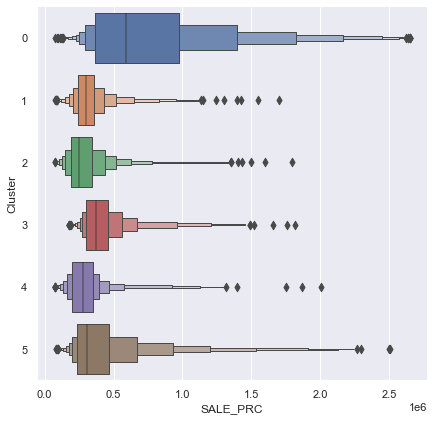

In [84]:
sb.catplot(x="SALE_PRC", y="Cluster", data=oceanData, kind="boxen", height=6)

### For water distance

In [85]:
waterData = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE', 'WATER_DIST']])
waterData.head()

,LATITUDE,LONGITUDE,WATER_DIST
0,25.891031,-80.160561,347.6
1,25.891324,-80.153968,337.8
2,25.891334,-80.153740,297.1
3,25.891765,-80.152657,0.0
4,25.891825,-80.154639,326.6


In [86]:
kmeans = KMeans(n_clusters=6) # not sure how many clusters we should have
waterData['Cluster'] = kmeans.fit_predict(waterData)
waterData['Cluster'] = waterData['Cluster'].astype("category")

waterData.head()

,LATITUDE,LONGITUDE,WATER_DIST,Cluster
0,25.891031,-80.160561,347.6,0
1,25.891324,-80.153968,337.8,0
2,25.891334,-80.153740,297.1,0
3,25.891765,-80.152657,0.0,0
4,25.891825,-80.154639,326.6,0


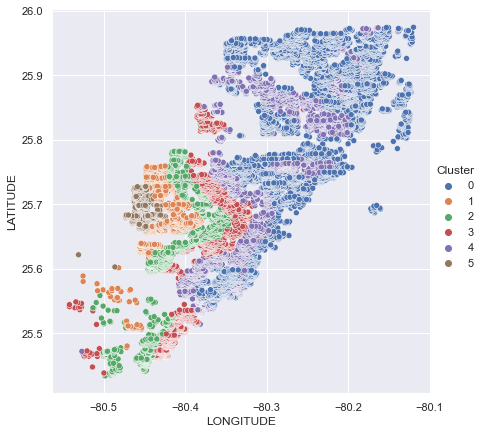

In [87]:
sb.relplot(x="LONGITUDE", y="LATITUDE", hue="Cluster", data=waterData, height=6)

#### using sale price as target

In [88]:
waterData["SALE_PRC"] = miamiData["SALE_PRC"]
waterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LATITUDE    13932 non-null  float64 
 1   LONGITUDE   13932 non-null  float64 
 2   WATER_DIST  13932 non-null  float64 
 3   Cluster     13932 non-null  category
 4   SALE_PRC    13932 non-null  int64   
dtypes: category(1), float64(3), int64(1)
memory usage: 449.3 KB


In [96]:
waterData.head(20)

,LATITUDE,LONGITUDE,WATER_DIST,Cluster,SALE_PRC
0,25.891031,-80.160561,347.6,0,440000
1,25.891324,-80.153968,337.8,0,349000
2,25.891334,-80.153740,297.1,0,800000
3,25.891765,-80.152657,0.0,0,988000
4,25.891825,-80.154639,326.6,0,755000
5,25.892060,-80.161354,188.9,0,630000
6,25.892473,-80.157217,0.0,0,1020000
7,25.893019,-80.157426,10.5,0,850000
8,25.893046,-80.161556,51.5,0,250000
9,25.893050,-80.158048,9.7,0,1220000


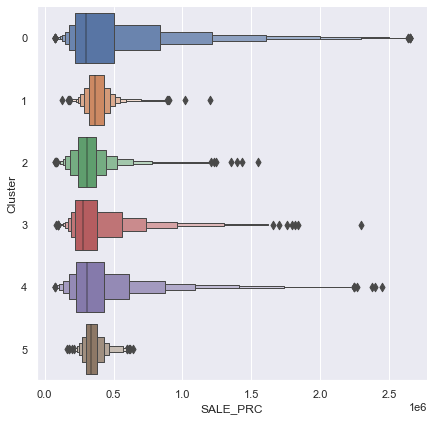

In [98]:
sb.catplot(x="SALE_PRC", y="Cluster", data=waterData, kind="boxen", height=6)